In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)

annees = np.arange(1980, 2021)
true_a = 0.3
true_b = 90
tempos = true_a * annees + true_b + np.random.normal(0, 3, size=len(annees))
df = pd.DataFrame({'Année': annees, 'Tempo (BPM)': tempos})
df.head()

,Année,Tempo (BPM)
0,1980,685.490142
1,1981,683.885207
2,1982,686.543066
3,1983,689.469090
4,1984,684.497540


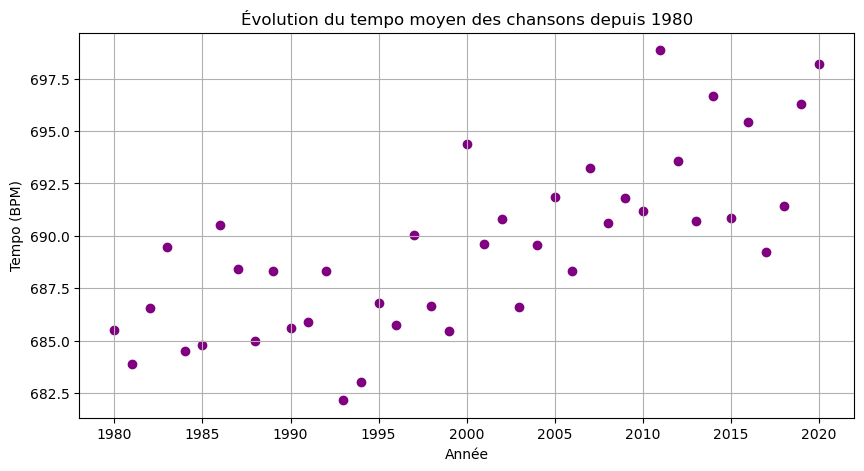

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Année'], df['Tempo (BPM)'], color='purple')
plt.title("Évolution du tempo moyen des chansons depuis 1980")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.grid(True)
plt.show()

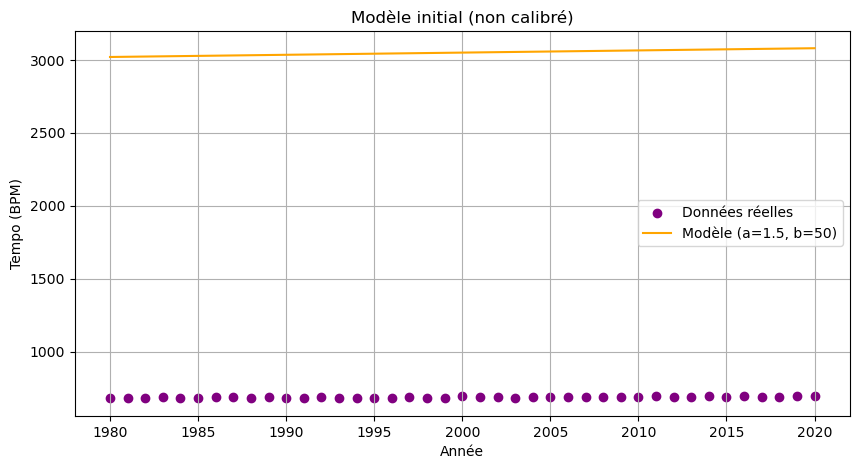

In [4]:
def modele_lineaire(x, a, b):
    return a * x + b

a_test, b_test = 1.5, 50
df['Tempo préd (modèle test)'] = modele_lineaire(df['Année'], a_test, b_test)

plt.figure(figsize=(10, 5))
plt.scatter(df['Année'], df['Tempo (BPM)'], label="Données réelles", color='purple')
plt.plot(df['Année'], df['Tempo préd (modèle test)'], label="Modèle (a=1.5, b=50)", color='orange')
plt.title("Modèle initial (non calibré)")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

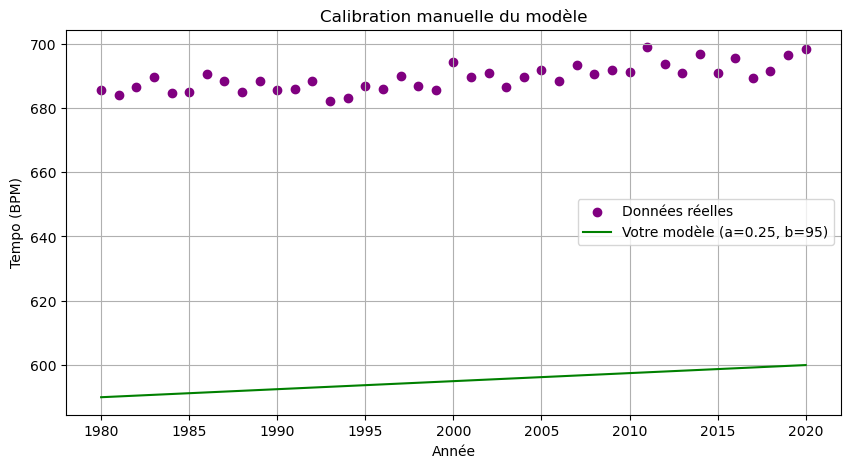

In [5]:
a_user = 0.25
b_user = 95

df['Tempo préd (vous)'] = modele_lineaire(df['Année'], a_user, b_user)

plt.figure(figsize=(10, 5))
plt.scatter(df['Année'], df['Tempo (BPM)'], label="Données réelles", color='purple')
plt.plot(df['Année'], df['Tempo préd (vous)'], label=f"Votre modèle (a={a_user}, b={b_user})", color='green')
plt.title("Calibration manuelle du modèle")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def erreur_moyenne_reelle_vs_modele(y_reel, y_modele):
    return np.mean(np.abs(y_reel - y_modele))

erreur = erreur_moyenne_reelle_vs_modele(df['Tempo (BPM)'], df['Tempo préd (vous)'])
print(f"Erreur moyenne de votre modèle : {erreur:.2f} BPM")

Erreur moyenne de votre modèle : 94.41 BPM


c:\Users\edenimal\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


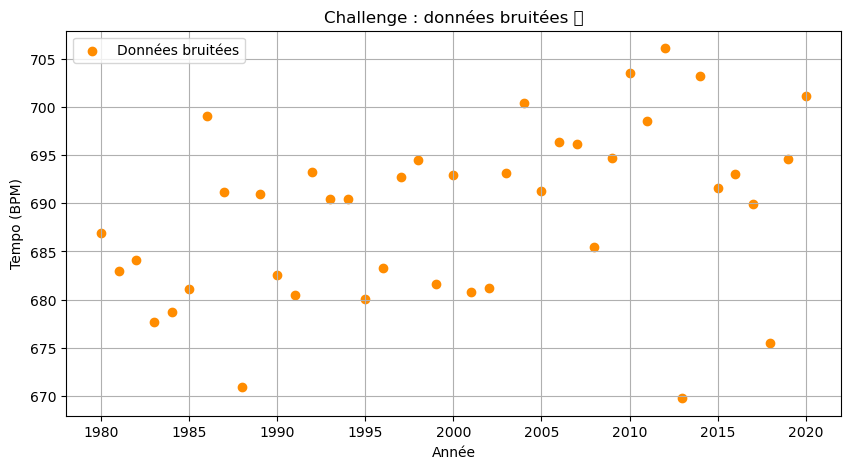

In [7]:
df_bruite = df.copy()
df_bruite['Tempo bruité'] = df_bruite['Tempo (BPM)'] + np.random.normal(0, 8, size=len(df))

plt.figure(figsize=(10, 5))
plt.scatter(df_bruite['Année'], df_bruite['Tempo bruité'], label="Données bruitées", color='darkorange')
plt.title("Challenge : données bruitées 🎯")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

### 🎤 Pourquoi il y a du bruit dans les données ?

Dans la vraie vie, les données ne sont jamais parfaites.

Voici quelques raisons :
- Les mesures peuvent contenir des **erreurs** (instruments imprécis, humains, etc.)
- Il existe des **facteurs non pris en compte** par le modèle (ex: genre musical, producteur, humeur du moment…)
- Le monde est **complexe et variable** : deux chansons d’une même année ne sont jamais identiques !

➡️ On appelle cela du **bruit** : c’est une variation aléatoire qui complique le travail du modèle... mais le rend aussi plus réaliste !

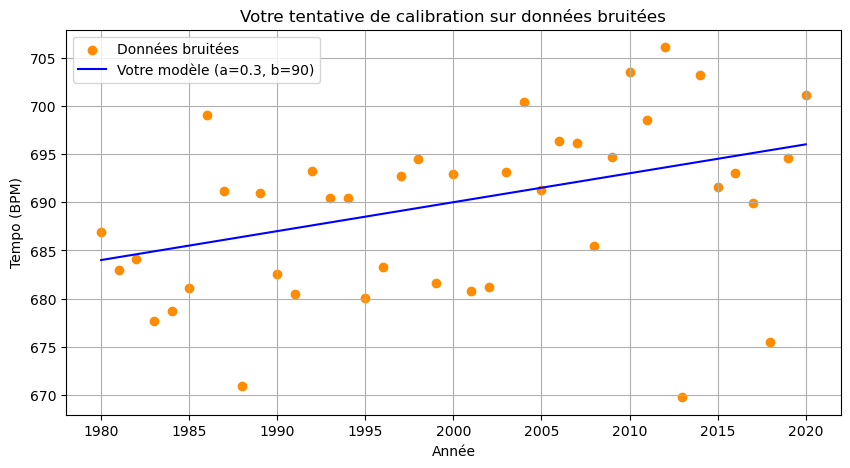

Erreur moyenne sur données bruitées : 6.38 BPM


In [8]:
a_bruite = 0.3
b_bruite = 90

df_bruite['Tempo préd'] = modele_lineaire(df_bruite['Année'], a_bruite, b_bruite)

plt.figure(figsize=(10, 5))
plt.scatter(df_bruite['Année'], df_bruite['Tempo bruité'], label="Données bruitées", color='darkorange')
plt.plot(df_bruite['Année'], df_bruite['Tempo préd'], label=f"Votre modèle (a={a_bruite}, b={b_bruite})", color='blue')
plt.title("Votre tentative de calibration sur données bruitées")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

erreur_bruite = erreur_moyenne_reelle_vs_modele(df_bruite['Tempo bruité'], df_bruite['Tempo préd'])
print(f"Erreur moyenne sur données bruitées : {erreur_bruite:.2f} BPM")

Paramètres optimisés automatiquement : a = -inf, b = -inf


c:\Users\edenimal\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


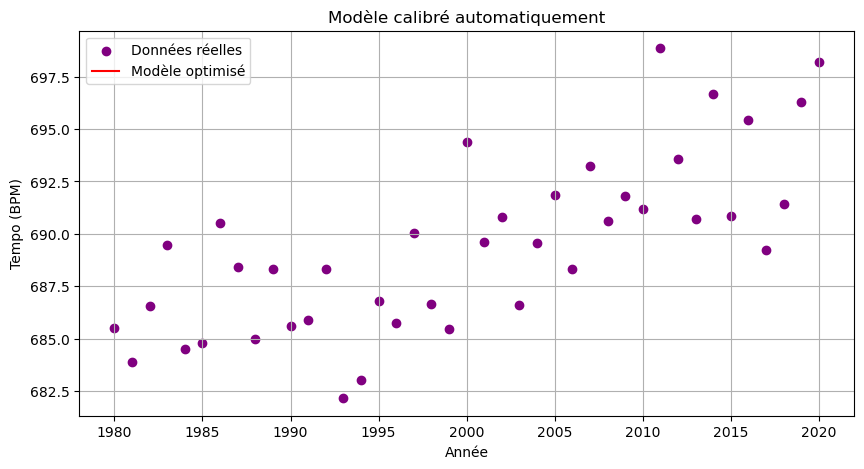

In [9]:
x = df['Année'].values
y = df['Tempo (BPM)'].values

a, b = 0.0, 0.0
learning_rate = 1e-4
epochs = 500

for _ in range(epochs):
    y_pred = a * x + b
    error = y - y_pred
    a += learning_rate * (-2 * np.mean(error * x))
    b += learning_rate * (-2 * np.mean(error))

print(f"Paramètres optimisés automatiquement : a = {a:.4f}, b = {b:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Données réelles", color='purple')
plt.plot(x, a * x + b, label="Modèle optimisé", color='red')
plt.title("Modèle calibré automatiquement")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from IPython.display import Markdown

Markdown("""
### 🔬 Ce que vous venez de faire, je le fais aussi dans ma recherche...

Vous avez testé et ajusté un **modèle simple** pour qu’il colle aux **données réelles**.

Moi aussi je fais ça ! Mais avec :
- des modèles plus complexes (non linéaires),
- des incertitudes à gérer,
- et des algorithmes puissants pour optimiser les paramètres.

👉 Vous venez de découvrir ce qu’est **la calibration** d’un modèle : c’est une étape clé en science des données, en climatologie, en santé, en ingénierie… et en musique aussi ! 🎶
""")


### 🔬 Ce que vous venez de faire, je le fais aussi dans ma recherche...

Vous avez testé et ajusté un **modèle simple** pour qu’il colle aux **données réelles**.

Moi aussi je fais ça ! Mais avec :
- des modèles plus complexes (non linéaires),
- des incertitudes à gérer,
- et des algorithmes puissants pour optimiser les paramètres.

👉 Vous venez de découvrir ce qu’est **la calibration** d’un modèle : c’est une étape clé en science des données, en climatologie, en santé, en ingénierie… et en musique aussi ! 🎶
